In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dat=pd.read_excel('exp.xlsx')
dat.t/=dat.k
dat

,name,t,k
0,p,4.424667,15
1,p,4.412000,15
2,pr,4.182667,15
3,pr,4.187333,15
4,pd,3.953333,15
5,pd,3.949333,15
6,pb,3.763333,15
7,pb,3.760667,15
8,prd,3.915333,15
9,prd,3.930000,15


In [3]:
ts=dict()
tsig=dict()
for i in dat.name:
    ts[i]=0
    tsig[i]=0
for i in range(14):
    ts[dat.name[i]]+=dat.t[i]/2
for i in range(7):
    tsig[dat.name[2*i]]=np.sqrt((dat.t[2*i]-ts[dat.name[2*i]])**2+(dat.t[2*i+1]-ts[dat.name[2*i]])**2)/ts[dat.name[2*i]]
print(ts)
print(tsig)

{'p': np.float64(4.418333333333334), 'pr': np.float64(4.1850000000000005), 'pd': np.float64(3.9513333333333334), 'pb': np.float64(3.762), 'prd': np.float64(3.9226666666666667), 'pbd': np.float64(3.6020000000000003), 'pbr': np.float64(3.783333333333333)}
{'p': np.float64(0.0020271639143785536), 'pr': np.float64(0.0007884902378821644), 'pd': np.float64(0.0007158158743240792), 'pb': np.float64(0.0005012275606497998), 'prd': np.float64(0.0026438390866934426), 'pbd': np.float64(0.0015704759160168513), 'pbr': np.float64(0.002990407532771222)}


In [4]:
ts['p'],ts['p']*tsig['p']

(np.float64(4.418333333333334), np.float64(0.008956685895029244))

In [5]:
kp=(9.81*0.1146*0.0305)/(4*np.pi**2*np.sqrt(2.14**2-(0.1146-0.00305)**2))
kp*1e6, kp*(0.04/2.14)*1e6

(np.float64(406.41598041757356), np.float64(7.596560381636888))

In [6]:
print(kp*983.2/1000*ts['p']**2,983.2/1000*0.25**2/8*1e3)
print(kp*983.2/1000*ts['p']**2*(0.04/2.14), 983.2/1000*0.25**2/8 *(0.1/1000)*1e3)

0.0078006285970839305 7.68125
0.0001458061420015688 0.000768125


In [7]:
kp=(0.25**2)/(8*(ts['p']**2))
kpsig=2*np.sqrt((0.001/0.25)**2+tsig['p']**2)
kp*1e6,kp*kpsig*1e6

(np.float64(400.19630607070394), np.float64(3.5892404864995227))

In [8]:
np.sqrt(2.14**2-(0.1146-0.00305)**2), (9.81*0.1146*0.0305)/(4*np.pi**2*kp)

(np.float64(2.137090685371119), np.float64(2.1703044055157235))

In [9]:
ms={'p':983.2/1000,'r':777/1000,'b':1199.3/1000,'d':584.1/1000}
msig={'p':0.5/1000,'r':0.5/1000,'b':0.5/1000,'d':0.5/1000}
for i in ms:
    msig[i]/=ms[i]
Ip=ms['p']*kp*ts['p']**2
Ipsig=np.sqrt(msig['p']**2+kpsig**2+4*tsig['p']**2)
Ipsig

np.float64(0.009855646341530445)

In [10]:
Is=dict()
Issig=dict()
for s in ts:
    mt=0
    mtsig=0
    for st in ms:
        mt+=(ms[st] if st in s else 0)
        mtsig+=(msig[st] if st in s else 0)
    I=mt*kp*ts[s]**2-Ip
    Is[s[1:]]=I
    Issig[s[1:]]=np.sqrt(mtsig**2+kpsig**2+4*tsig[s]**2)
    print(s[1:],'&',"$%.4f" %ts[s],r'\pm',"%.4f $" %tsig[s],"& $%.3f" %((I+Ip)*1e3),r"\pm %.3f $ \\ \hline" %(Issig[s[1:]]*I*1e3))
print(Is)
print(Issig)

 & $4.4183 \pm 0.0020 $ & $7.681 \pm 0.000 $ \\ \hline
r & $4.1850 \pm 0.0008 $ & $12.337 \pm 0.043 $ \\ \hline
d & $3.9513 \pm 0.0007 $ & $9.793 \pm 0.019 $ \\ \hline
b & $3.7620 \pm 0.0005 $ & $12.361 \pm 0.042 $ \\ \hline
rd & $3.9227 \pm 0.0026 $ & $14.436 \pm 0.072 $ \\ \hline
bd & $3.6020 \pm 0.0016 $ & $14.365 \pm 0.065 $ \\ \hline
br & $3.7833 \pm 0.0030 $ & $16.953 \pm 0.101 $ \\ \hline
{'': np.float64(0.0), 'r': np.float64(0.004656217367326208), 'd': np.float64(0.002111677642248974), 'b': np.float64(0.004680071742480326), 'rd': np.float64(0.0067548231224461245), 'bd': np.float64(0.006683790846240524), 'br': np.float64(0.00927151858072318)}
{'': np.float64(0.009855646341530445), 'r': np.float64(0.009178869611489688), 'd': np.float64(0.009184180488635509), 'b': np.float64(0.009071877115588416), 'rd': np.float64(0.010603274377467413), 'bd': np.float64(0.009668339681284499), 'br': np.float64(0.010893545784889295)}


In [11]:
for s in ['r','d','b']:
    print(s[1:]," & ~ & $%.2f" %((Is[s])*1e3),r"\pm %.2f $ \\ \hline" %(Issig[s]*Is[s]*1e3))

  & ~ & $4.66 \pm 0.04 $ \\ \hline
  & ~ & $2.11 \pm 0.02 $ \\ \hline
  & ~ & $4.68 \pm 0.04 $ \\ \hline


In [12]:
0.777*((15.15+0.48)/200)**2*1e3

4.7454672825

In [13]:
0.5841/2*(17.05/200)**2*1e3

2.122491628125

In [14]:
1.1993/12*(0.211**2+0.027**2)*1e3

4.522360416666666

In [15]:
Is['p']=Is['']
Issig['p']=Issig['']
for s in ['r','d','b']:
    s+='p'
    print('v',"%.3f" % (abs(Is[s[0]])*1e3), end=' ')
    print('s',"%.3f" % (np.sqrt((Is[s[0]]*Issig[s[0]])**2+(Is[s[1]]*Issig[s[1]])**2)*1e3))
    print()

v 4.656 s 0.043

v 2.112 s 0.019

v 4.680 s 0.042



In [16]:
for s in ['bd','br','rd']:
    print('&',"$%.3f$" % (abs(Is[s]-(Is[s[0]]+Is[s[1]]))*1e3), end=' ')
    print('&',"$%.3f$" % (np.sqrt((Is[s]*Issig[s])**2+(Is[s[0]]*Issig[s[0]])**2+(Is[s[1]]*Issig[s[1]])**2)*1e3),end=r' \\ \hline')
    print()

& $0.108$ & $0.080$ \\ \hline
& $0.065$ & $0.118$ \\ \hline
& $0.013$ & $0.086$ \\ \hline


In [17]:
dat=pd.read_excel('gugen.xlsx')
dat.t1/=15
dat.t2/=15
dat.h/=100

t=(dat.t1+dat.t2)/2
dat

,h,t1,t2
0,0.00,3.100667,3.090000
1,0.02,3.177333,3.174667
2,0.04,3.446000,3.446667
3,0.06,3.852667,3.862000
4,0.08,4.362667,4.361333


In [18]:
def getkb(X,Y):
    k=(np.average(Y*X)-np.average(Y)*np.average(X))/(np.average(X*X)-np.average(X)**2)
    b=np.average(Y)-k*np.average(X)
    def av(n):
        return np.average(n)
    sigk=np.sqrt((av(Y*Y)-av(Y)*av(Y))/(av(X*X)-av(X)**2) - k*k)/np.sqrt(X.shape[0])
    sigb=sigk*np.sqrt(av(X*X)-av(X)**2)
    return k,b,sigk,sigb

k,b,sigk,sigb=getkb(dat.h**2,t**2)

In [19]:
k,b,sigk,sigb

(np.float64(1483.2135600255428),
 np.float64(9.530555922605362),
 np.float64(5.815970351351825),
 np.float64(0.013723718372205462))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


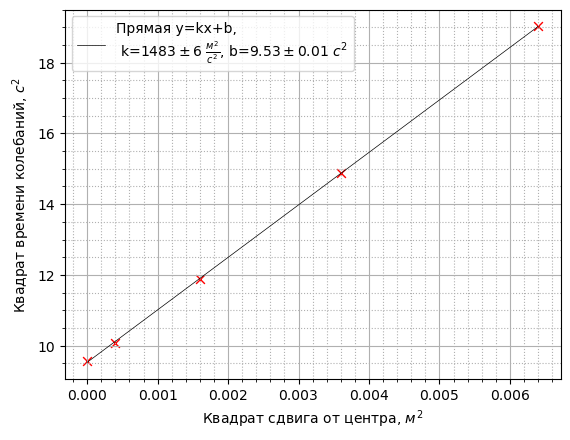

In [20]:
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')


plt.plot(dat.h**2,dat.h**2*k+b,'black',linewidth=0.5,label="Прямая y=kx+b,\n k=${0:.0f}\pm{3:.0f}$ ${2}$, b=${1:.2f}\pm{4:.2f}$ $c^2$".format(k,b,r"\frac{м^2}{c^2}",sigk,sigb))
plt.scatter(dat.h**2,t**2,40,'r', marker='x', linewidth=1)

plt.legend()
plt.xlabel(r"Квадрат сдвига от центра, $м^2$")
plt.ylabel(r"Квадрат времени колебаний, $c^2$")

plt.savefig('imgs/graph.eps')

In [21]:
mcyl=721/1000
mpl=983.2/1000

In [22]:
kpr=2*mcyl/(kp*(mpl+2*mcyl))

In [23]:
(kpr-k)/kpr

np.float64(0.0017046180163981894)

In [24]:
mcyl2=ms['p']*k*kp/(2*(1-k*kp))
print(mcyl2*1e3)
(mcyl2-mcyl)/mcyl

717.9759872265238


np.float64(-0.004194192473614691)

In [26]:
mcyl2sig=np.sqrt(msig['p']**2+4*kpsig**2+4*(sigk/k)**2)
mcyl2sig

np.float64(0.019583462666072585)

In [27]:
mcyl2*mcyl2sig*1e3

np.float64(14.060455940987236)